# Dominant Color Tutorial
*Reference*:
- https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook?rq=1
- https://matplotlib.org/examples/color/named_colors.html
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

In [24]:
import cv2
import numpy as np
from skimage import io

img = io.imread('https://i.stack.imgur.com/DNM65.png')[:, :, :-1]

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

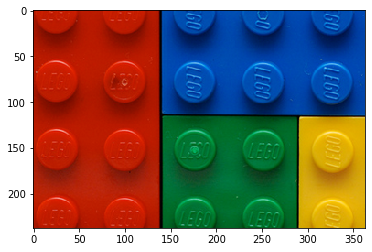

In [26]:
plt.imshow(img)

In [56]:
pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)
palette = palette/255
dominant = palette[np.argmax(counts)]

In [51]:
labels

array([[1],
       [1],
       [1],
       ...,
       [4],
       [0],
       [4]], dtype=int32)

In [52]:
palette

array([[0.62473816, 0.6200739 , 0.60641146],
       [0.17475204, 0.11923067, 0.10792528],
       [0.76915425, 0.8494335 , 0.8841758 ],
       [0.32229888, 0.24847506, 0.2680238 ],
       [0.4915697 , 0.46598604, 0.46544823]], dtype=float32)

In [53]:
palette.shape

(5, 3)

In [54]:
counts

array([3517, 6540,  469, 3716, 4448])

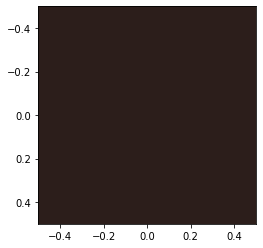

In [57]:
plt.imshow([[dominant]])

[0.17442289 0.11903065 0.1077472 ]


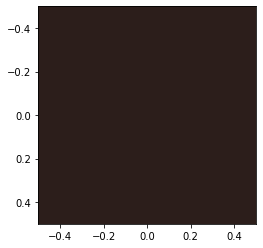

[0.32152864 0.247979   0.2673828 ]


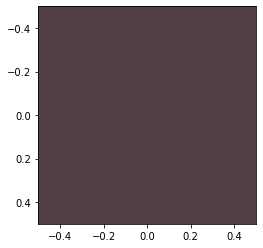

[0.4913944  0.46522495 0.4647081 ]


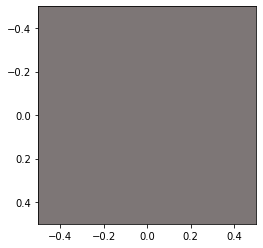

[0.768885   0.84876204 0.8831423 ]


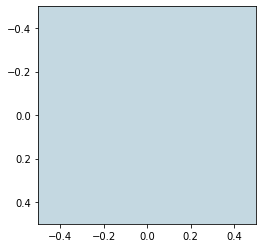

[0.6240901  0.61946595 0.6058518 ]


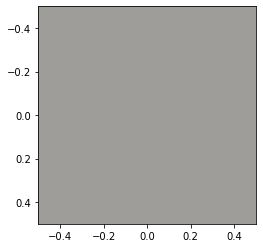

In [59]:
for color in palette:
    print(color)
    plt.imshow([[color]])
    plt.show()

In [122]:
def getDominantColor(img):
    pixels = np.float32(img.reshape(-1, 3))

    n_colors = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.1)
    flags = cv2.KMEANS_RANDOM_CENTERS

    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)
    palette = palette/255
    dominant = palette[np.argmax(counts)]
    print("palette : {}".format(palette))
    print("dominant : {}".format(dominant))
    return palette, dominant

In [78]:
cv2.TERM_CRITERIA_EPS

2

In [79]:
cv2.TERM_CRITERIA_MAX_ITER

1

In [75]:
def showPaletteColors(palette):
    for color in palette:
        print(color)
        plt.imshow([[color]])
        plt.show()

In [91]:
palette, dominant = getDominantColor(img)

palette : [[0.00712492 0.28384045 0.6644833 ]
 [0.8511836  0.6545403  0.04038044]
 [0.01066195 0.11493071 0.30152515]
 [0.00852659 0.4176985  0.17854156]
 [0.703529   0.10722072 0.00899781]]
dominant : [0.703529   0.10722072 0.00899781]


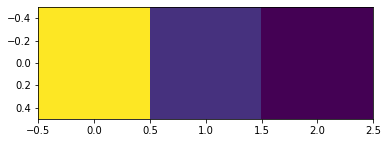

In [82]:
plt.imshow([dominant])

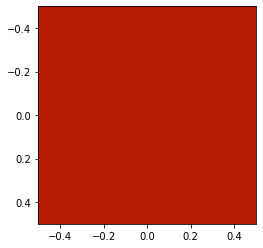

In [83]:
plt.imshow([[dominant]])

(30, 10, 3)


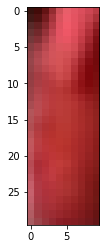

In [153]:
image_path = 'testImage/test1.png'
img = io.imread(image_path)[120:150, 10:20, :-1]
print(img.shape)
plt.imshow(img)

In [154]:
palette, dominant = getDominantColor(img)

palette : [[0.69269156 0.21357964 0.22177927]
 [0.44012067 0.08476622 0.08597285]
 [0.7370636  0.295648   0.3207078 ]
 [0.5812572  0.13904268 0.14388697]
 [0.85616696 0.32966477 0.36951298]]
dominant : [0.69269156 0.21357964 0.22177927]


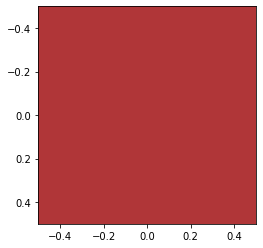

In [155]:
plt.imshow([[dominant]])

In [148]:
def plotColorHistogram(img):
    color = ('b','g','r')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([img],[channel],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.title('Histogram for color scale picture')
    plt.show()

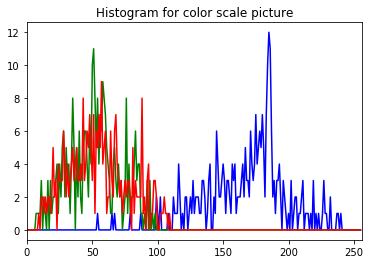

In [140]:
plotColorHistogram(img)

In [145]:
palette, dominant = getDominantColor(img)

palette : [[0.44278076 0.10891266 0.09518716]
 [0.34404817 0.09362359 0.06796356]
 [0.2633433  0.08434696 0.06305528]
 [0.19887419 0.09785157 0.08456703]
 [0.3764706  0.15499534 0.1742297 ]]
dominant : [0.19887419 0.09785157 0.08456703]


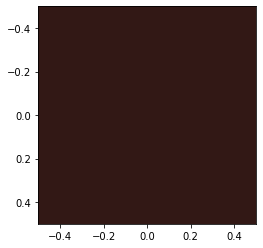

In [146]:
plt.imshow([[dominant]])

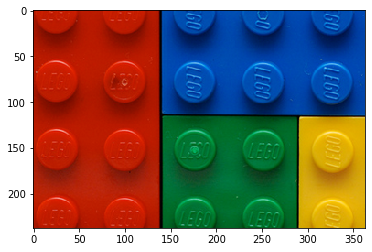

In [135]:
image_path = 'https://i.stack.imgur.com/DNM65.png'
img = io.imread(image_path)[:, :, :-1]
plt.imshow(img)

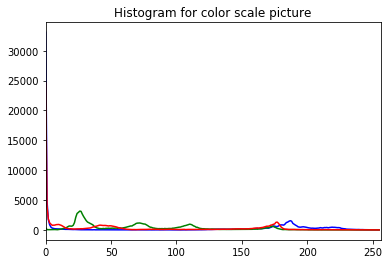

In [136]:
plotColorHistogram(img)

In [109]:
palette, dominant = getDominantColor(img)

palette : [[0.57289314 0.08238653 0.00946303]
 [0.09095473 0.63879174 0.38436392]
 [0.04093871 0.04969585 0.04352941]
 [0.00200979 0.43694225 0.18622856]
 [0.00154586 0.2741728  0.66303277]
 [0.0775782  0.48170933 0.82455915]
 [0.00156445 0.14817028 0.4134522 ]
 [0.8512098  0.6551398  0.04008893]
 [0.01854178 0.33009437 0.12906095]
 [0.73667395 0.11372504 0.00901163]]
dominant : [0.73667395 0.11372504 0.00901163]


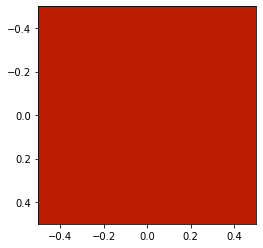

In [112]:
plt.imshow([[dominant]])

[0.00712492 0.28384045 0.6644833 ]


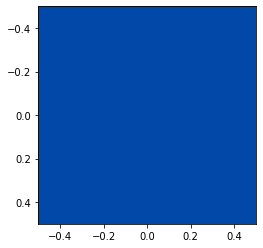

[0.703529   0.10722072 0.00899781]


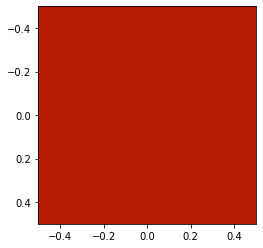

[0.8511836  0.6545403  0.04038044]


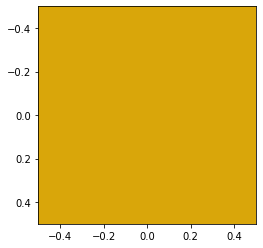

[0.00852659 0.4176985  0.17854156]


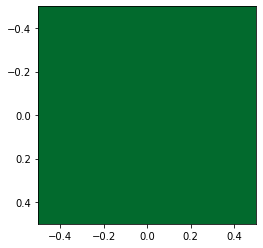

[0.01066195 0.11493071 0.30152515]


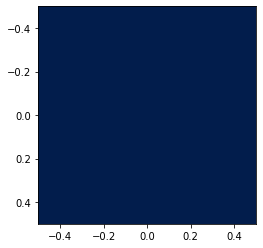

In [77]:
showPaletteColors(palette)